#Librerias



In [2]:
import spacy
from spacy import displacy
from bs4 import BeautifulSoup
import requests
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
!python -m spacy download en_core_web_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
nlp = spacy.load("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

#Web Scraping

In [4]:
url = "https://eldenring.wiki.fextralife.com/Lore"

In [5]:
contenido = requests.get(url).text

In [6]:
soup = BeautifulSoup(contenido, "html.parser")

#Spacy

## Fragmento de la pagina

In [ ]:
texto_completo = soup.get_text()
texto_importante = soup.find("div", {"class":"col-sm-6"})
texto = texto_importante.get_text().strip()

In [ ]:
texto

"Elden Ring Lore Overview\nThe storyteller folds her slender hands - both pairs - and speaks. “It happened an age ago. But when I recall, I see it true.” So begins the tale of the Shattering, a devastating war between the children of Marika, Demigods of the Lands Between. One grim night in the depths of winter, a flock of unknown assassins stole across the Lands Between.\nIn a coetaneous attack, this foul covenant snuffed out the lives of many of the God-Queen's kin throughout the empire, too numerous and too scattered for her godly protection to save. The assassins' targets were multifold, but none was as devastating a loss to the Eternal Queen as that of Godwyn the Golden. After his death, the Elden Ring was somehow shattered, and the order of the world broke with it.\nOut of this chaos came war. Open, bitter war, pitting blood against blood and kin against kin. The conflict broke a vast and prosperous empire into brittle fragments. No single side could find enough purchase to mainta

In [ ]:
doc = nlp(texto)

### Tokenización

In [ ]:
tokens = [token.text for token in doc]
print(tokens)

['Elden', 'Ring', 'Lore', 'Overview', '\n', 'The', 'storyteller', 'folds', 'her', 'slender', 'hands', '-', 'both', 'pairs', '-', 'and', 'speaks', '.', '“', 'It', 'happened', 'an', 'age', 'ago', '.', 'But', 'when', 'I', 'recall', ',', 'I', 'see', 'it', 'true', '.', '”', 'So', 'begins', 'the', 'tale', 'of', 'the', 'Shattering', ',', 'a', 'devastating', 'war', 'between', 'the', 'children', 'of', 'Marika', ',', 'Demigods', 'of', 'the', 'Lands', 'Between', '.', 'One', 'grim', 'night', 'in', 'the', 'depths', 'of', 'winter', ',', 'a', 'flock', 'of', 'unknown', 'assassins', 'stole', 'across', 'the', 'Lands', 'Between', '.', '\n', 'In', 'a', 'coetaneous', 'attack', ',', 'this', 'foul', 'covenant', 'snuffed', 'out', 'the', 'lives', 'of', 'many', 'of', 'the', 'God', '-', 'Queen', "'s", 'kin', 'throughout', 'the', 'empire', ',', 'too', 'numerous', 'and', 'too', 'scattered', 'for', 'her', 'godly', 'protection', 'to', 'save', '.', 'The', 'assassins', "'", 'targets', 'were', 'multifold', ',', 'but', 

### Lematización

In [ ]:
for token in doc:
    if not token.is_punct and not token.is_space:
        print(f"'{token.text}' -> '{token.lemma_}'")

'Elden' -> 'Elden'
'Ring' -> 'Ring'
'Lore' -> 'Lore'
'Overview' -> 'Overview'
'The' -> 'the'
'storyteller' -> 'storyteller'
'folds' -> 'fold'
'her' -> 'her'
'slender' -> 'slender'
'hands' -> 'hand'
'both' -> 'both'
'pairs' -> 'pair'
'and' -> 'and'
'speaks' -> 'speak'
'It' -> 'it'
'happened' -> 'happen'
'an' -> 'an'
'age' -> 'age'
'ago' -> 'ago'
'But' -> 'but'
'when' -> 'when'
'I' -> 'I'
'recall' -> 'recall'
'I' -> 'I'
'see' -> 'see'
'it' -> 'it'
'true' -> 'true'
'So' -> 'so'
'begins' -> 'begin'
'the' -> 'the'
'tale' -> 'tale'
'of' -> 'of'
'the' -> 'the'
'Shattering' -> 'shattering'
'a' -> 'a'
'devastating' -> 'devastating'
'war' -> 'war'
'between' -> 'between'
'the' -> 'the'
'children' -> 'child'
'of' -> 'of'
'Marika' -> 'Marika'
'Demigods' -> 'demigod'
'of' -> 'of'
'the' -> 'the'
'Lands' -> 'Lands'
'Between' -> 'between'
'One' -> 'one'
'grim' -> 'grim'
'night' -> 'night'
'in' -> 'in'
'the' -> 'the'
'depths' -> 'depth'
'of' -> 'of'
'winter' -> 'winter'
'a' -> 'a'
'flock' -> 'flock'
'of

### Etiquetado gramatical

In [ ]:
for token in doc:
    if not token.is_space:
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'Elden' -> PROPN (proper noun) -> NNP
'Ring' -> PROPN (proper noun) -> NNP
'Lore' -> PROPN (proper noun) -> NNP
'Overview' -> PROPN (proper noun) -> NNP
'The' -> DET (determiner) -> DT
'storyteller' -> NOUN (noun) -> NN
'folds' -> VERB (verb) -> VBZ
'her' -> PRON (pronoun) -> PRP$
'slender' -> ADJ (adjective) -> JJ
'hands' -> NOUN (noun) -> NNS
'-' -> PUNCT (punctuation) -> :
'both' -> DET (determiner) -> DT
'pairs' -> NOUN (noun) -> NNS
'-' -> PUNCT (punctuation) -> ,
'and' -> CCONJ (coordinating conjunction) -> CC
'speaks' -> VERB (verb) -> VBZ
'.' -> PUNCT (punctuation) -> .
'“' -> PUNCT (punctuation) -> ``
'It' -> PRON (pronoun) -> PRP
'happened' -> VERB (verb) -> VBD
'an' -> DET (determiner) -> DT
'age' -> NOUN (noun) -> NN
'ago' -> ADV (adverb) -> RB
'.' -> PUNCT (punctuation) -> .
'But' -> CCONJ (coordinating conjunction) -> CC
'when' -> SCONJ (subordinating conjunction) -> WRB
'I' -> PRON (pronoun) -> PRP
'recall' -> VERB (verb) -> VBP
',' -> PUNCT (punctuation) -> ,
'I' -> PRO

### Analisis de dependencia sintactica

In [ ]:
for token in doc:
     if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'Elden' -> compound (compound) -> 'Overview'
'Ring' -> compound (compound) -> 'Overview'
'Lore' -> compound (compound) -> 'Overview'
'Overview' -> nsubj (nominal subject) -> 'folds'
'The' -> det (determiner) -> 'storyteller'
'storyteller' -> nsubj (nominal subject) -> 'folds'
'folds' -> ROOT (root) -> 'folds'
'her' -> poss (possession modifier) -> 'hands'
'slender' -> amod (adjectival modifier) -> 'hands'
'hands' -> dobj (direct object) -> 'folds'
'-' -> punct (punctuation) -> 'hands'
'both' -> det (determiner) -> 'pairs'
'pairs' -> appos (appositional modifier) -> 'hands'
'-' -> punct (punctuation) -> 'pairs'
'and' -> cc (coordinating conjunction) -> 'pairs'
'speaks' -> conj (conjunct) -> 'pairs'
'.' -> punct (punctuation) -> 'folds'
'“' -> punct (punctuation) -> 'happened'
'It' -> nsubj (nominal subject) -> 'happened'
'happened' -> ROOT (root) -> 'happened'
'an' -> det (determiner) -> 'age'
'age' -> npadvmod (noun phrase as adverbial modifier) -> 'ago'
'ago' -> advmod (adverbial modi

### Grafico de dependencias

In [ ]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

### Grafico de entidades

In [ ]:
displacy.render(doc,style='ent',jupyter=True,options={'distance':200})

## Pagina entera

In [7]:
parrafos = soup.get_text()

In [13]:
parrafos[0:5000]

'\n\n\n\n\n\n\n\n\n\nLore | Elden Ring Wiki\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nVIP\n\n\n\n\n\n \n\n\n\nGuest \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome\n\n\n\n\nWikis\n\n\n\n\nNews\n\n\n\n\nReviews\n\n\n\n\nGuides\n\n\n\n\nForum\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n NEW & Wiki Home NEW & Wiki Home Recently Updated Classes Weapons Armor Skills (Combat Arts) Online Features Walkthrough Elden Ring Forums Wiki To-Do Wiki Shop Fextralife Blog Fextralife Wiki Hub General Information General Information About Elden Ring Patch Notes About Nightreign DLC Shadow of the Erdtree Secrets Controls Combat Skills Spirit Steed Mount Game Mechanics FAQs Character Information Character Information Character Creation Classes Keepsakes Stats Status Effects Buffs & Debuffs Builds PvE Builds PvP Builds Gestures Rebirth - Respeccing Equipment Equipment & Magic Weapons Damage Types Spirits Ashes Skills Spells List Sorceries Incantations Shields 

In [8]:
pagina_entera = nlp(parrafos)

In [9]:
palabras_clave = []

for token in pagina_entera:
    if token.is_alpha and not token.is_stop:
      palabras_clave.append(token.lemma_.lower())

print(f"Se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words).")
print(f"Ejemplo: {palabras_clave[:10]}")

Se extrajeron 13393 palabras clave (lemas, sin stop words).
Ejemplo: ['lore', 'elden', 'ring', 'wiki', 'vip', 'guest', 'home', 'wikis', 'news', 'reviews']


In [10]:
frecuencia_palabras = Counter(palabras_clave)
palabras_mas_comunes = frecuencia_palabras.most_common(100)

In [11]:
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}' : {frecuencia}")

- 'marika' : 174
- 'elden' : 171
- 'ring' : 130
- 'tarnished' : 104
- 'submit' : 103
- 'order' : 87
- 'golden' : 86
- 'erdtree' : 76
- 'death' : 76
- 'miquella' : 76
- 'player' : 74
- 'game' : 69
- 'radagon' : 67
- 'world' : 63
- 'lands' : 62
- 'lord' : 62
- 'replyreplies' : 62
- 'find' : 58
- 'great' : 58
- 'greater' : 58
- 'lore' : 56
- 'ranni' : 54
- 'god' : 53
- 'like' : 52
- 'land' : 48
- 'know' : 47
- 'war' : 43
- 'black' : 42
- 'flame' : 41
- 'time' : 38
- 'new' : 37
- 'godwyn' : 37
- 'come' : 37
- 'character' : 36
- 'life' : 36
- 'shadow' : 35
- 'grace' : 34
- 'rune' : 34
- 'power' : 34
- 'knife' : 34
- 'people' : 33
- 'dragon' : 33
- 'give' : 32
- 'queen' : 32
- 'demigod' : 32
- 'godfrey' : 32
- 'create' : 31
- 'live' : 31
- 'night' : 30
- 'take' : 29
- 'warrior' : 29
- 'finger' : 29
- 'hornsent' : 28
- 'fingers' : 28
- 'armor' : 27
- 'leave' : 27
- 'think' : 27
- 'information' : 26
- 'rennala' : 26
- 'apr' : 26
- 'dark' : 25
- 'radahn' : 25
- 'encounter' : 25
- 'long' : 24
- 

In [12]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='cividis',
    max_words=100,
    stopwords=None,
    collocations=False

).generate_from_frequencies(frecuencia_palabras)

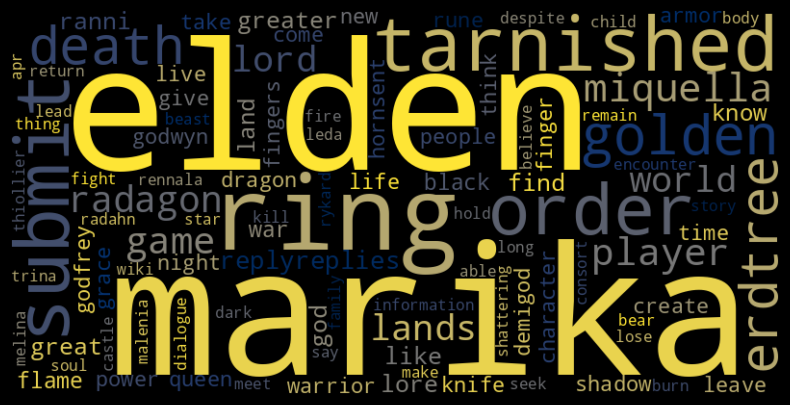

In [15]:
plt.figure(figsize=(10, 5))
#plt.style.use('dark_background')
plt.imshow(wordcloud_generator, interpolation='bilinear')
plt.axis("off")
#plt.tight_layout(pad=0)
plt.show()